<a href="https://colab.research.google.com/github/nimendra-ag/AI_Project_prep/blob/main/6sem_project_test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opendatasets

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix
import opendatasets as od
import os

In [ ]:
pip install opencv-python

  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/39.5 MB 653.6 kB/s eta 0:01:01
   ---------------------------------------- 0.1/39.5 MB 871.5 kB/s eta 0:00:46
   ---------------------------------------- 0.2/39.5 MB 833.5 kB/s eta 0:00:48
   ---------------------------------------- 0.2/39.5 MB 958.6 kB/s eta 0:00:41
   ---------------------------------------- 0.3/39.5 MB 1.1 MB/s eta 0:00:36
   ---------------------------------------- 0.3/39.5 MB 1.1 MB/s eta 0:00:36
   ---------------------------------------- 0.5/39.5 MB 1.2 MB/s eta 0:00:34
    --------------------------------------- 0.5/39.5 MB 1.2 MB/s eta 0:00:33
    --------------------------------------- 0.6/39.5 MB 1.3 MB/s eta 0:00:31
    --------------------------------------- 0.7/39.5 MB 1.3 MB/s eta 0:00:30
  

In [ ]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from imblearn.over_sampling import RandomOverSampler

In [ ]:
od.download('https://www.kaggle.com/datasets/rm1000/brain-tumor-mri-scans')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  nimendraamiththa


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/rm1000/brain-tumor-mri-scans


100%|██████████| 236M/236M [02:00<00:00, 2.05MB/s] 


In [ ]:
dataset_path = "brain-tumor-mri-scans"

In [ ]:
X_data = []
y_data = []

classes = sorted(os.listdir(dataset_path))

In [ ]:
classes

['glioma', 'healthy', 'meningioma', 'pituitary']

In [ ]:
IMAGE_SIZE = 244

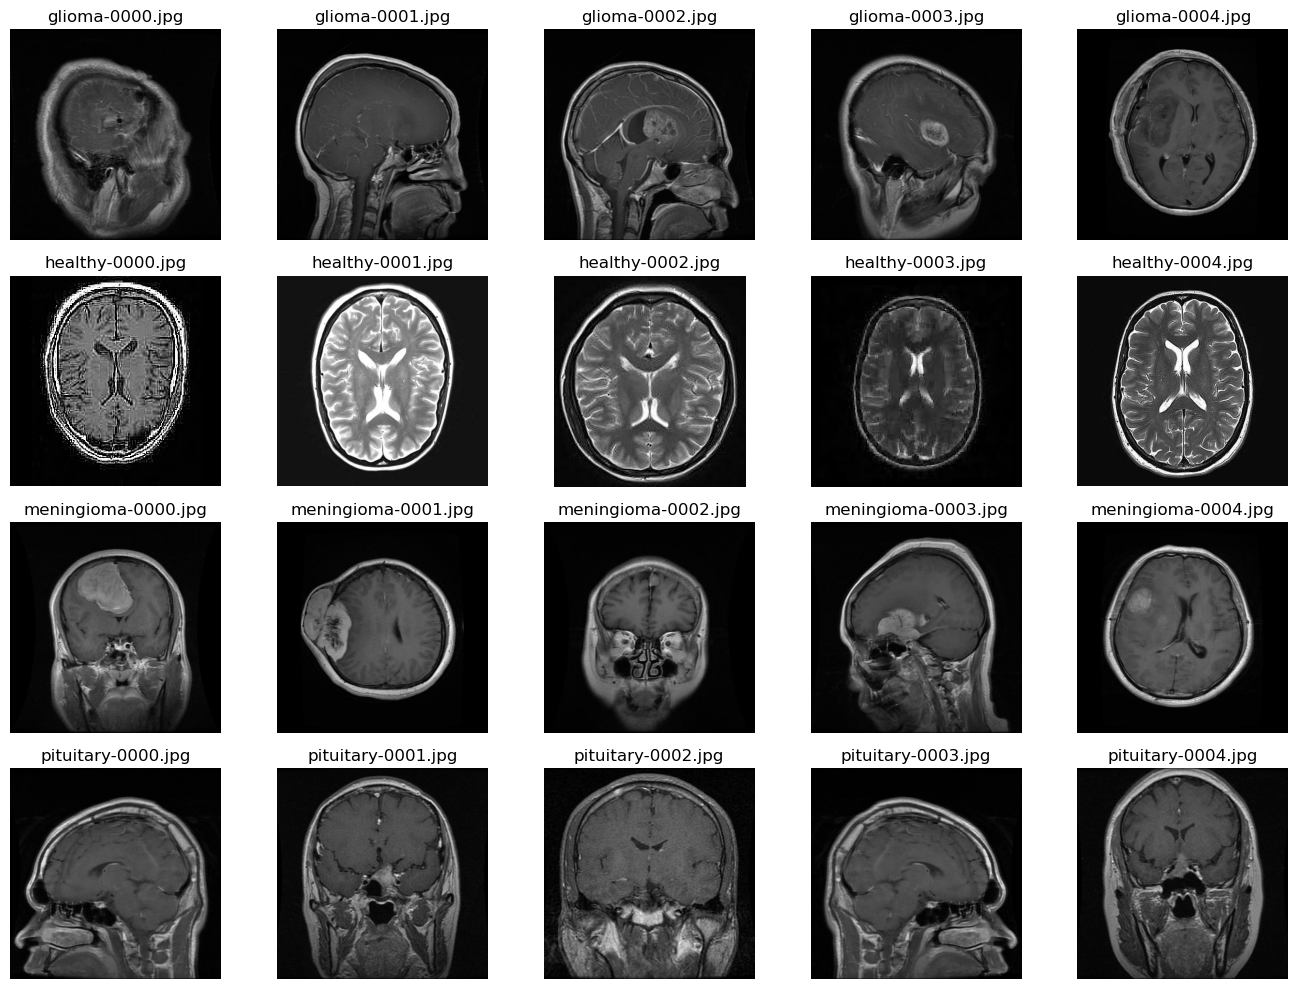

In [ ]:
from PIL import Image
base_path = dataset_path
plt.figure(figsize=(15, 10))
image_count = 1

for label in classes:
    label_path = os.path.join(dataset_path, label)
    images = os.listdir(label_path)[:5]  # Get the first 5 images from the class
    # print(images)
    for img_name in images:
        img_path = os.path.join(label_path, img_name)
        img = Image.open(img_path)
        img_array = np.asarray(img)

        plt.subplot(len(classes), 5, image_count)
        plt.imshow(img_array)
        plt.title(f"{label}-{img_name}")
        plt.axis("off")
        plt.tight_layout()
        image_count += 1

plt.tight_layout()
plt.show()


In [ ]:
for label in classes:
  folder = os.path.join(dataset_path, label)
  for image_name in os.listdir(folder):
    image_path = os.path.join(folder, image_name)
    image = cv2.imread(image_path)
    image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
    X_data.append(image)
    y_data.append(label)


In [ ]:
X_data[0:5]

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[2, 2, 2],
         [2, 2, 2],
         [2, 2, 2],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[2, 2, 2],
         [2, 2, 2],
         [2, 2, 2],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

In [ ]:
X_data = np.array(X_data)
y_data = np.array(y_data)

In [ ]:
X_data.shape

(7023, 244, 244, 3)

In [ ]:
y_data.shape

(7023,)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X_data, y_data, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
print("train:", X_train.shape)
print("val:", X_val.shape)
print("test:", X_test.shape)

train: (4213, 244, 244, 3)
val: (1405, 244, 244, 3)
test: (1405, 244, 244, 3)


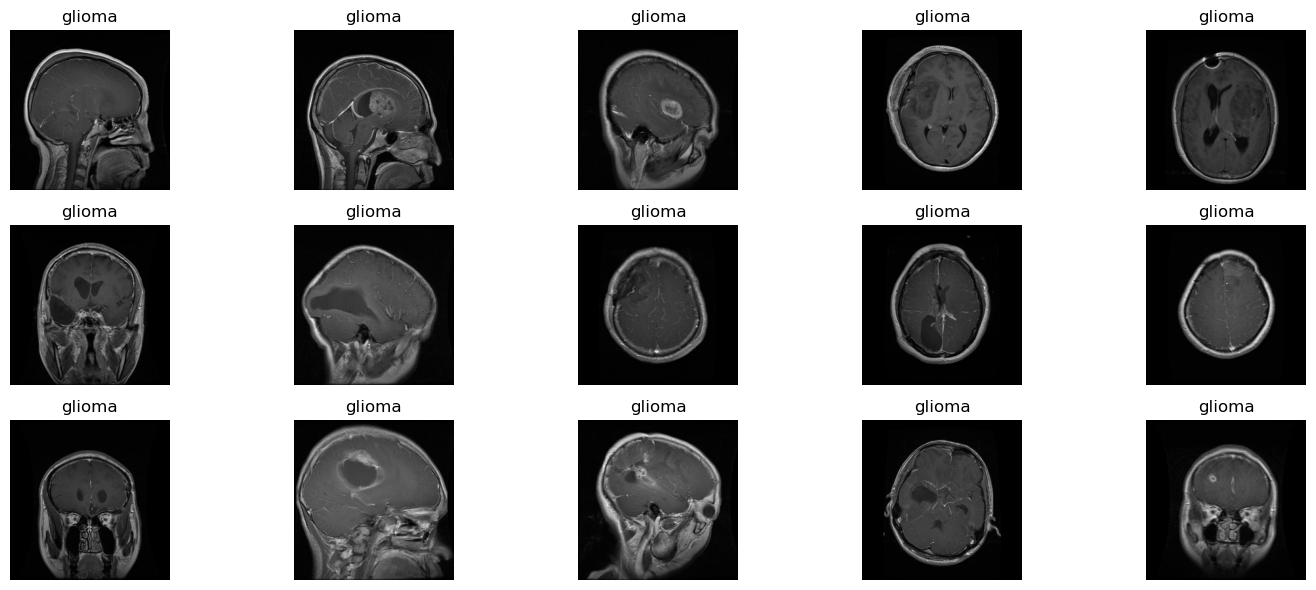

In [ ]:
#plot data samples from different categories
plt.figure(figsize=(15, 6))

for i in range(1, 16):
    plt.subplot(3, 5, i)
    plt.imshow(X_data[i])
    plt.title(y_data[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
class_counts = pd.Series(y_train).value_counts()
print("Number of samples in each category:")
print(class_counts)

Number of samples in each category:
healthy       1212
pituitary     1055
meningioma    1014
glioma         932
Name: count, dtype: int64


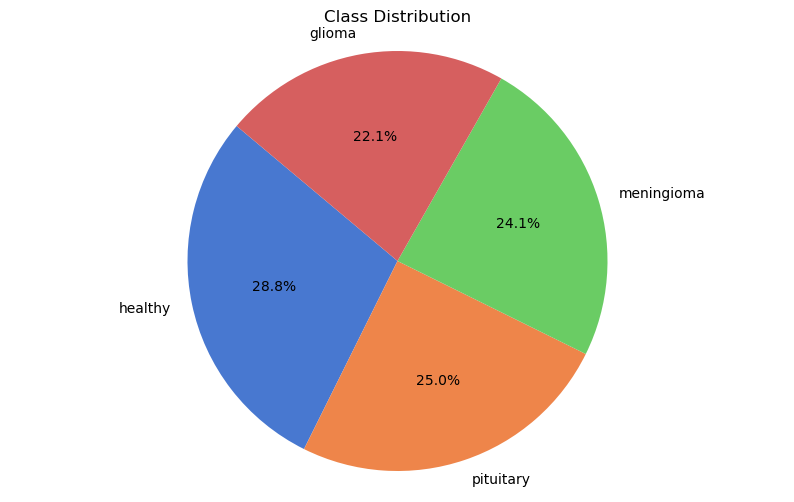

In [ ]:
plt.figure(figsize=(10, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("muted"))
plt.title("Class Distribution")
plt.axis('equal')
plt.show()

In [ ]:
X_train = X_train / 255.0

In [ ]:
y_train

array(['pituitary', 'pituitary', 'pituitary', ..., 'meningioma',
       'pituitary', 'glioma'], dtype='<U10')

In [ ]:
classes

['glioma', 'healthy', 'meningioma', 'pituitary']

In [ ]:
y_train_one_hot = [classes.index(label) for label in y_train]
y_data = tf.keras.utils.to_categorical(y_train_one_hot, num_classes=len(classes))

In [ ]:
y_train

array(['pituitary', 'pituitary', 'pituitary', ..., 'meningioma',
       'pituitary', 'glioma'], dtype='<U10')

In [ ]:
y_data

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

In [ ]:
y_data_labels = np.argmax(y_data, axis=1)
print(y_data_labels)

[3 3 3 ... 2 3 0]


In [ ]:
oversampler = RandomOverSampler()
x_data_resampled, y_data_resampled = oversampler.fit_resample(X_train.reshape(-1, IMAGE_SIZE*IMAGE_SIZE*3), y_data_labels)
x_data_resampled = x_data_resampled.reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 3)

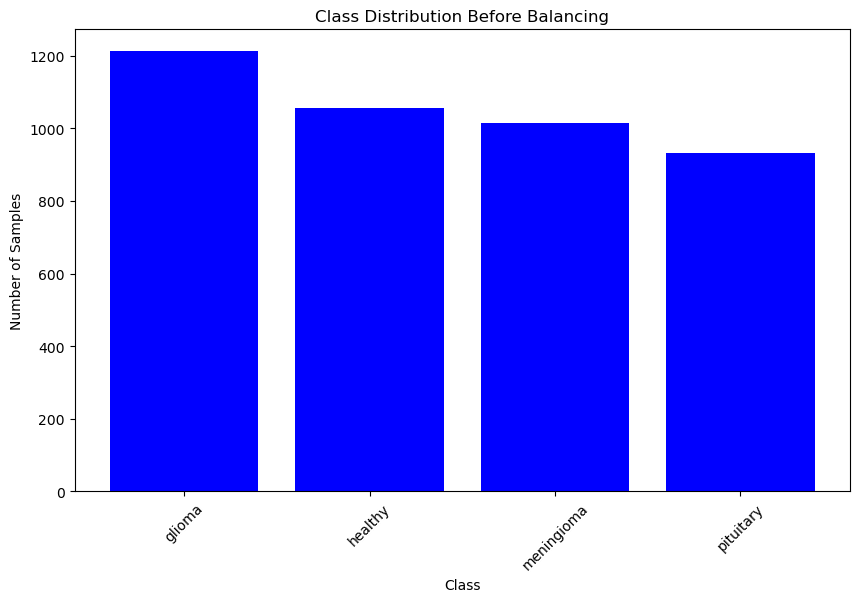

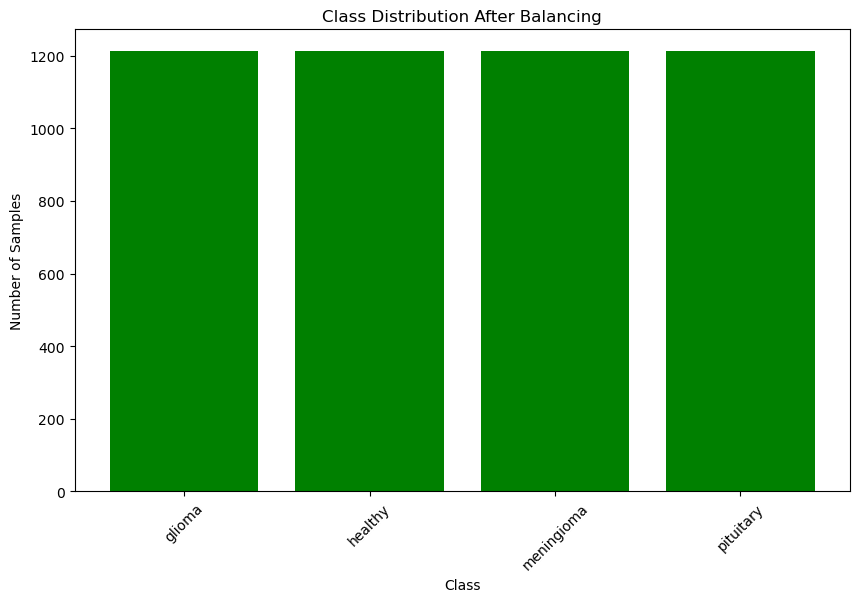

In [ ]:
# Plot class distribution before balancing
plt.figure(figsize=(10, 6))
plt.bar(classes, class_counts, color='blue')
plt.title("Class Distribution Before Balancing")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.show()

# Plot class distribution after balancing
plt.figure(figsize=(10, 6))
plt.bar(classes, np.bincount(y_data_resampled), color='green')
plt.title("Class Distribution After Balancing")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.show()

In [ ]:
class_counts = pd.Series(y_data_resampled).value_counts()
print("Number of samples in each category:")
print(class_counts)

Number of samples in each category:
3    1212
1    1212
0    1212
2    1212
Name: count, dtype: int64


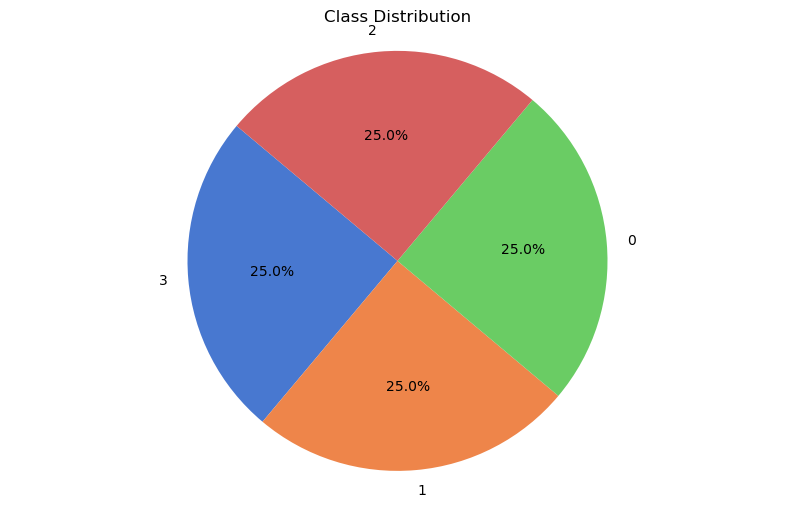

In [ ]:
# Pie chart visualization after oversampling
plt.figure(figsize=(10, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("muted"))
plt.title("Class Distribution")
plt.axis('equal')
plt.show()

In [ ]:
print("Dataset Size after oversampling:")
print("Number of images:", len(x_data_resampled))
print("Number of labels:", len(y_data_resampled))

Dataset Size after oversampling:
Number of images: 4848
Number of labels: 4848


In [ ]:
# Create an ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Fit the ImageDataGenerator on the training data
datagen.fit(x_data_resampled)

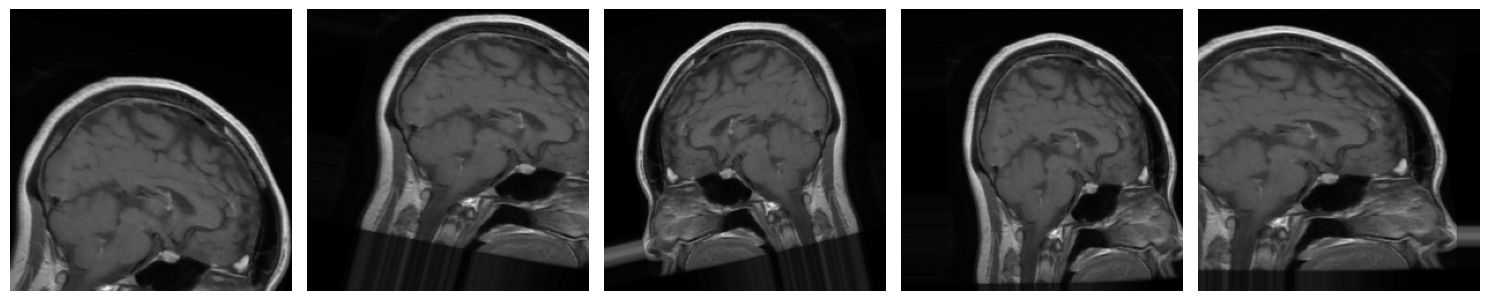

In [ ]:
# Visualize image augmentation
sample_image = x_data_resampled[0]
sample_image = sample_image.reshape((1,) + sample_image.shape)

fig, ax = plt.subplots(1, 5, figsize=(15, 6))
i = 0

for batch in datagen.flow(sample_image, batch_size=1):
    ax[i].imshow(batch[0])
    ax[i].axis('off')
    i += 1
    if i % 5 == 0:
        break

plt.tight_layout()
plt.show()

In [ ]:
# # Generate augmented data and add to the dataset
# augmented_images = []
# augmented_labels = []

# for i in range(len(x_data_resampled)):
#     augmented_image = datagen.random_transform(x_data_resampled[i])
#     augmented_images.append(augmented_image)
#     augmented_labels.append(y_data_resampled[i])

# augmented_images = np.array(augmented_images)
# augmented_labels = np.array(augmented_labels)

# Combine original and augmented data
# x_data_combined = np.concatenate((x_data_resampled, augmented_images))
# y_data_combined = np.concatenate((y_data_resampled, augmented_labels))
x_data_combined = x_data_resampled
y_data_combined = y_data_resampled

In [ ]:
crop_size = 200

# Function to center crop images
def center_crop(image, crop_size):
    height, width = image.shape[:2]
    startx = width // 2 - (crop_size // 2)
    starty = height // 2 - (crop_size // 2)
    cropped_image = image[starty:starty + crop_size, startx:startx + crop_size]
    return cropped_image

x_data_combined_cropped = []
y_data_combined_cropped = []

for i in range(len(x_data_combined)):
    cropped_image = center_crop(x_data_combined[i], crop_size)
    x_data_combined_cropped.append(cropped_image)
    y_data_combined_cropped.append(y_data_combined[i])

x_data_combined_cropped = np.array(x_data_combined_cropped)
y_data_combined_cropped = np.array(y_data_combined_cropped)


print("Original images shape:", x_data_resampled.shape)
# print("Augmented images shape:", augmented_images.shape)
print("Combined images shape:", x_data_combined.shape)
print("Cropped images shape:", x_data_combined_cropped.shape)
print("Original labels shape:", y_data_resampled.shape)
# print("Augmented labels shape:", augmented_labels.shape)
print("Combined labels shape:", y_data_combined.shape)
print("Cropped labels shape:", y_data_combined_cropped.shape)


Original images shape: (4848, 244, 244, 3)
Combined images shape: (4848, 244, 244, 3)
Cropped images shape: (4848, 200, 200, 3)
Original labels shape: (4848,)
Combined labels shape: (4848,)
Cropped labels shape: (4848,)


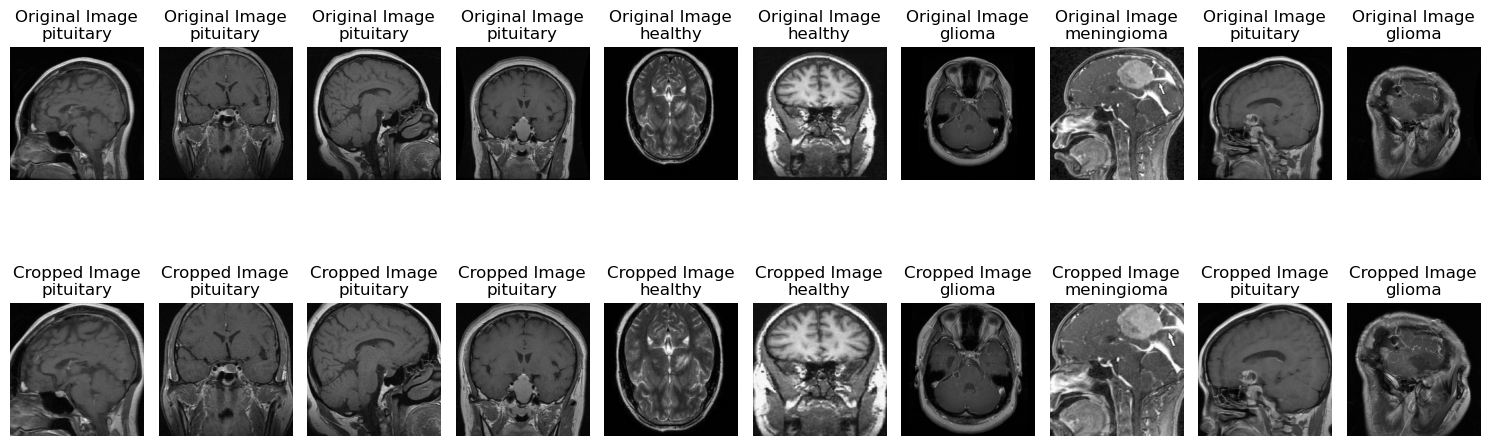

In [ ]:
import matplotlib.pyplot as plt

# Function to display original and cropped images side by side
def display_images_with_crop(original_images, cropped_images, labels, cropped_labels, class_names, num_samples=10):
    plt.figure(figsize=(15, 6))
    rows = 2
    cols = num_samples

    for i in range(num_samples):
        # Display original image
        plt.subplot(rows, cols, i + 1)
        plt.imshow(original_images[i])
        plt.title("Original Image\n" + class_names[labels[i]])
        plt.axis("off")

        # Display cropped image
        plt.subplot(rows, cols, num_samples + i + 1)
        plt.imshow(cropped_images[i])
        plt.title("Cropped Image\n" + class_names[cropped_labels[i]])
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Display original and cropped images side by side
display_images_with_crop(x_data_combined[:10], x_data_combined_cropped[:10], y_data_combined[:10], y_data_combined_cropped[:10], classes, num_samples=10)


In [ ]:
# Class distribution visualization after augmentation
class_counts = pd.Series(y_data_combined_cropped).value_counts()
print("Number of samples in each category:")
print(class_counts)

Number of samples in each category:
3    1212
1    1212
0    1212
2    1212
Name: count, dtype: int64


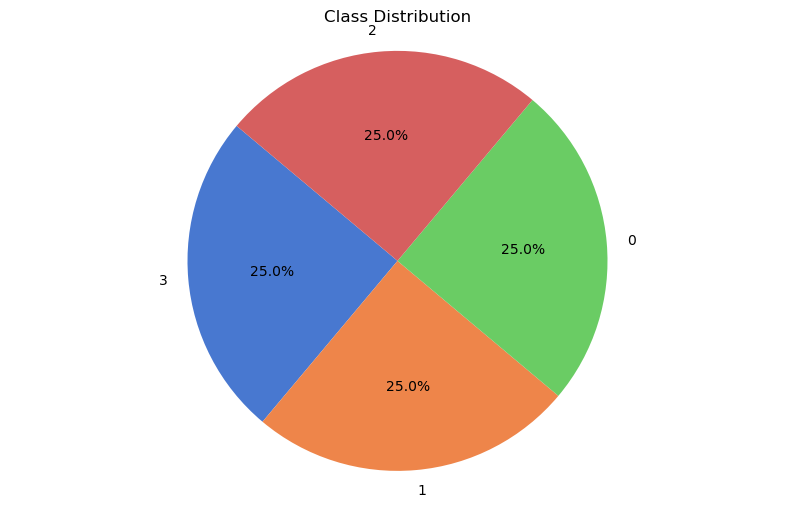

In [ ]:
# Pie chart visualization after augmentation
plt.figure(figsize=(10, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("muted"))
plt.title("Class Distribution")
plt.axis('equal')
plt.show()

In [ ]:
print("Dataset Size after augmentation and the crop:")
print("Number of images:", len(x_data_combined_cropped))
print("Number of labels:", len(y_data_combined_cropped))

Dataset Size after augmentation and the crop:
Number of images: 4848
Number of labels: 4848


In [ ]:
# Reshape y_data_combined
y_data_combined_cropped= tf.keras.utils.to_categorical(y_data_combined_cropped, num_classes=4)

In [ ]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x_data_combined_cropped,y_data_combined_cropped, test_size=0.1, random_state=101)

In [ ]:
print("Training Dataset Size:")
print("Number of images:", len(x_train))
print("Number of labels:", len(y_train))

print("\nTesting Dataset Size:")
print("Number of images:", len(x_test))
print("Number of labels:", len(y_test))

Training Dataset Size:
Number of images: 4363
Number of labels: 4363

Testing Dataset Size:
Number of images: 485
Number of labels: 485


In [ ]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(4, activation='softmax')
])
model.summary()

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 196, 196, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 98, 98, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 98, 98, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 96, 96, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 94, 94, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 47, 47, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 47, 47, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 43, 43, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 41, 41, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 18, 18, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     8,389,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,560,900 (36.47 MB)

 Trainable params: 9,559,876 (36.47 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 305s 2s/step - accuracy: 0.5429 - loss: 1.0502 - val_accuracy: 0.2975 - val_loss: 7.5016
Epoch 2/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 288s 2s/step - accuracy: 0.7344 - loss: 0.6480 - val_accuracy: 0.5789 - val_loss: 1.1897
Epoch 3/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 274s 2s/step - accuracy: 0.7864 - loss: 0.5399 - val_accuracy: 0.8192 - val_loss: 0.4697
Epoch 4/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 272s 2s/step - accuracy: 0.7754 - loss: 0.5536 - val_accuracy: 0.7483 - val_loss: 0.7426
Epoch 5/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 275s 2s/step - accuracy: 0.8448 - loss: 0.4159 - val_accuracy: 0.8307 - val_loss: 0.4477
Epoch 6/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 272s 2s/step - accuracy: 0.8744 - loss: 0.3413 - val_accuracy: 0.8581 - val_loss: 0.3798
Epoch 7/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 274s 2s/step - accuracy: 0.8721 - loss: 0.3268 - val_accuracy: 0.6773 - val_loss: 1.0001
Epoch 8/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 539s 4s/step - accuracy: 0.9029 - loss: 0.2419 - val_accu